# 3. Implementierung der Hauptkomponentenanalyse

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
%matplotlib inline
%load_ext version_information

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


## a) Implementieren Sie ein Python-Modul, das eine Funktion zur Hauptkomponentenanalyse zur Verfügung stellt.

In [45]:
def pca(data, n):
    # Schritt 1: Daten zentrieren
    X_meaned = data - np.mean(data, axis=0)

    # Schritt 2: Daten standardisieren
    X_std = np.std(X_meaned, axis=0)
    X_standardized = X_meaned / X_std

    # Schritt 3: Singulärwertzerlegung
    U, Sigma, VT = np.linalg.svd(X_standardized)

    # Schritt 4: Auswahl der ersten n Hauptkomponenten
    V = VT.T[:, :n]

    # Schritt 5: Projektion der Daten auf die Hauptkomponenten
    X_pca = np.dot(X_standardized, V)

    return X_pca, Sigma[:n], V

## b) Testen Sie Ihr Modul innerhalb eines IPython-Notebooks am Datensatz Boston Housing.
### Lassen Sie dabei die Variable TGT weg. Stellen Sie Ihre Ergebnisse in einer Tabelle mit den Eigenwerten der Kovarianzmatrix (Achtung: die Diagonalelemente von müssen dafür quadriert und durch n − 1 geteilt werden. Warum?), dem Anteil der zugehörigen Hauptkomponente an an der Gesamtvarianz (“erklärte Varianz”), ### und der kumulativen erklärten Varianz dar, d.h. welchen Varianzanteil die ersten Komponenten zusammen erklären.
-> Quadrierung und "n-1", ist notwendig, um eine konsistente Schätzung der Kovarianzmatrix zu erhalten, wenn man mit Stichproben arbeitet.

In [60]:
# Boston Housing-Datensatz laden
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'TGT']
boston = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols, index_col=False)

# Zielvariable 'TGT' entfernen
X = boston.drop('TGT', axis=1)

# PCA-Anwendung
num_components = len(X.columns)
X_pca, Sigma, V = pca(X, num_components)

# Umrechnung von Singulärwerten in Eigenwerte
eigenvalues = (Sigma**2) / (len(X) - 1)

# Gesamtvarianz
total_variance = sum(eigenvalues)

# Erklärte Varianz für jede Komponente
explained_variances = [(i / total_variance) * 100 for i in eigenvalues]

# Kumulative erklärte Varianz
cumulative_variances = np.cumsum(explained_variances)

# Tabellarische Darstellung
results = pd.DataFrame({
    'Eigenwert': eigenvalues,
    'Erklärte Varianz (%)': explained_variances,
    'Kumulative erklärte Varianz (%)': cumulative_variances
})

print("Ergebnisse der PCA-Analyse:")
print(results)

Ergebnisse der PCA-Analyse:
    Eigenwert  Erklärte Varianz (%)  Kumulative erklärte Varianz (%)
0    6.138981             47.129606                        47.129606
1    1.436113             11.025193                        58.154800
2    1.245077              9.558590                        67.713389
3    0.859273              6.596732                        74.310121
4    0.836469              6.421661                        80.731782
5    0.658709              5.056978                        85.788760
6    0.536416              4.118124                        89.906884
7    0.396882              3.046902                        92.953786
8    0.277492              2.130333                        95.084120
9    0.220674              1.694137                        96.778257
10   0.186383              1.430880                        98.209137
11   0.169638              1.302331                        99.511467
12   0.063635              0.488533                       100.000000


### Wieviele Dimensionen können Sie weglassen, wenn Sie 10%, 5% und 1% Fehler bei der Dimensionsreduktion zulassen?
* 10% - 5 Dimensionen
* 5% - 4 Dimensionen
* 1% - 1 Dimensionen

## c) Berechnen Sie die Matrix der Korrelationskoeffizienten für die transformierten Variablen und interpretieren Sie das Ergebnis.

In [76]:
# Berechnung der Korrelationsmatrix der Hauptkomponenten
correlation_matrix = np.corrcoef(X_pca.T)

# Ausgabe der Korrelationsmatrix
print("Korrelationsmatrix der Hauptkomponenten:")
print(correlation_matrix)

Korrelationsmatrix der Hauptkomponenten:
[[ 1.00000000e+00  5.87594887e-15  4.07138810e-17 -2.83332738e-17
  -3.44602737e-16  1.74921782e-17  1.72516146e-16  3.78590268e-16
   5.39008550e-17  3.32435844e-16  9.76662062e-16 -1.44769845e-16
  -1.26626646e-17]
 [ 5.87594887e-15  1.00000000e+00  8.41775544e-17  3.19618107e-16
   1.28374729e-17  3.03792453e-16 -5.29014375e-16  1.16480701e-16
   6.21289948e-16  3.84276720e-16  6.04256434e-16 -1.14025662e-16
   6.10879695e-16]
 [ 4.07138810e-17  8.41775544e-17  1.00000000e+00 -2.04045149e-16
   2.67126789e-16 -4.66095740e-16  3.14204641e-16 -1.53870469e-16
   2.48349763e-16 -2.28162396e-16 -1.75246400e-16 -6.58229380e-16
   4.74871577e-16]
 [-2.83332738e-17  3.19618107e-16 -2.04045149e-16  1.00000000e+00
   5.80866436e-17 -6.54567484e-16 -2.02063024e-16 -7.52926662e-16
   2.30514440e-16 -3.49368519e-16 -8.76215785e-17  5.98859128e-17
   5.71621666e-16]
 [-3.44602737e-16  1.28374729e-17  2.67126789e-16  5.80866436e-17
   1.00000000e+00 -1.1373

* Korrelieren sehr schwach. Macht Sinn, ist schließlich der Zweck der PCA.

## d.1) Berechnen Sie den Korrelationskoeffizienten der Projektionen auf die ersten drei Hauptkomponenten mit den ursprünglichen Variablen. 

In [78]:
# Berechnung der Projektionen auf die ersten drei Hauptkomponenten
X_pca_3, _, _ = pca(X, 3)

# Berechnung der Korrelation zwischen den Projektionen und den ursprünglichen Variablen
correlations = pd.DataFrame(np.corrcoef(X_pca_3.T, X.T)[:3, 3:])

# Benennen der Spalten und Zeilen für die bessere Lesbarkeit
correlations.columns = X.columns
correlations.index = [f"PC{i+1}" for i in range(3)]

# Ausgabe der Korrelationsmatrix
print("Korrelationsmatrix zwischen den ersten drei Hauptkomponenten und den ursprünglichen Variablen:")
print(correlations)

Korrelationsmatrix zwischen den ersten drei Hauptkomponenten und den ursprünglichen Variablen:
         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
PC1  0.621167 -0.634442  0.858099  0.012481  0.848644 -0.468422  0.776412   
PC2 -0.377418 -0.387068  0.134676  0.544519  0.262324  0.178779  0.373498   
PC3  0.274854  0.329801 -0.017775  0.323027  0.134842  0.662105 -0.019703   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
PC1 -0.795901  0.791566  0.837795  0.507283 -0.502407  0.766732  
PC2 -0.417905 -0.325063 -0.286673 -0.366218  0.285602 -0.088978  
PC3 -0.055442  0.320211  0.246070 -0.360554 -0.334581 -0.297632  


## d.2) Interpretieren Sie Ihr Ergebnis.

Viele hohe Korrelationen.
PC1 und PC2 korrelieren teilweise mit den gleichen Variablen, allerdings manchmal mit verschiedenem Vorzeichen. Man erkennt, dass die ersten Hauptkomponenten die höchste korrelation haben, was zeigt das die PCA funktioniert. 

CHAS Scheint mit der ersten Hauptkomponente kaum zu korrelieren, dafür mit den anderen.

Die stärkste Korrelation hat TAX mit der ersten hauptkomponente.

## e.1) Stellen Sie die ersten beiden der neuen Variablen als Scatterplot dar (am besten in Pandas-Dataframe importieren). Plotten Sie dabei alle Datenpunkte mit einem Hauspreis oberhalb des Medians aller Hauspreise in einer anderen Farbe als die Datenpunkte unterhalb.

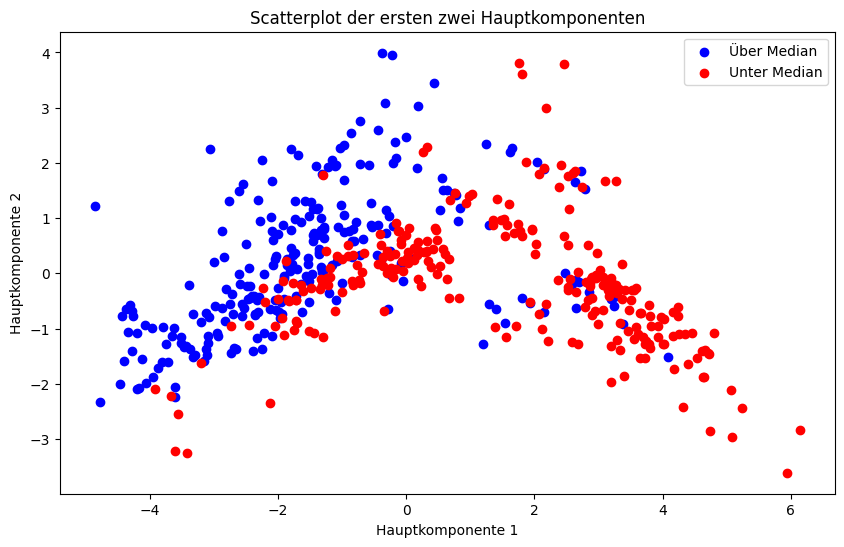

In [81]:
median_tgt = boston['TGT'].median()

plot_data = pd.DataFrame({
    'PC1': X_pca_3[:, 0],
    'PC2': X_pca_3[:, 1],
    'Above_Median': boston['TGT'] > median_tgt
})

# Erstellung des Scatterplots
plt.figure(figsize=(10, 6))
plt.scatter(plot_data[plot_data['Above_Median']]['PC1'], plot_data[plot_data['Above_Median']]['PC2'], color='blue', label='Über Median')
plt.scatter(plot_data[~plot_data['Above_Median']]['PC1'], plot_data[~plot_data['Above_Median']]['PC2'], color='red', label='Unter Median')
plt.title('Scatterplot der ersten zwei Hauptkomponenten')
plt.xlabel('Hauptkomponente 1')
plt.ylabel('Hauptkomponente 2')
plt.legend()
plt.show()


## e.2) Eignen sich die beiden neuen Variablen zur Vorhersage des Hauspreises?

Ja sie eignen sich dazu. Man kann erkennen, dass Instanzen unten rechts (große Hauptkomponente 1, kleine Hauptkomponente 2) billiger sind als Instanzen oben links, welche teurer als der durchschnitt sind.

In [82]:
%version_information

Software versions
Python 3.10.11 64bit [MSC v.1929 64 bit (AMD64)]
IPython 8.17.1
OS Windows 10 10.0.19045 SP0
Tue Oct 31 12:02:29 2023 Mitteleuropäische Zeit

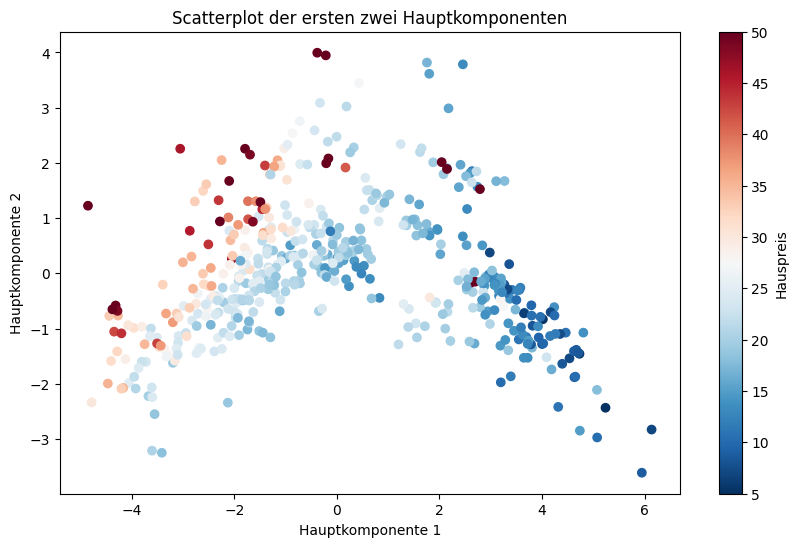

In [87]:
colors = boston['TGT']

plt.figure(figsize=(10, 6))
plt.scatter(plot_data['PC1'], plot_data['PC2'], c=colors, cmap='RdBu_r')
plt.colorbar().set_label('Hauspreis')
plt.title('Scatterplot der ersten zwei Hauptkomponenten')
plt.xlabel('Hauptkomponente 1')
plt.ylabel('Hauptkomponente 2')
plt.show()
